In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import pickle as pkl

## Load dataset

In [2]:
df = pd.read_csv('data/retail_price.csv')

In [3]:
df.columns

Index(['product_id', 'product_category_name', 'month_year', 'qty',
       'total_price', 'freight_price', 'unit_price', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_score', 'customers', 'weekday', 'weekend', 'holiday', 'month',
       'year', 's', 'volume', 'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2',
       'comp_3', 'ps3', 'fp3', 'lag_price'],
      dtype='object')

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [ ]:
"""
Dataset description & \\
    product_id: A unique identifier for each product in the dataset.
    product_category_name & The name of the product category to which the product belongs. \\
    month_year & The month and year of the retail transaction or data recording. \\
    qty & The quantity of the product sold or purchased in a given transaction. \\
    total_price & The total price of the product, including any applicable taxes or discounts. \\
    freight_price & The cost of shipping or freight associated with the product. \\
    unit_price & The price of a single unit of the product. \\
    product_name_length & The length of the product name in terms of the number of characters. \\
    product_description_length & The length of the product description in terms of the number of characters. \\
    product_photos_qty & The number of photos available for the product in the dataset. \\
    product_weight_g & The weight of the product in grams. \\
    product_score & A score or rating associated with the product’s quality, popularity, or other relevant factors. \\
    customers & The number of customers who purchased the product in a given transaction. \\
    weekday & The day of the week on which the transaction occurred. \\
    weekend & A binary flag indicating whether the transaction occurred on a weekend (1) or not (0). \\
    holiday & A binary flag indicating whether the transaction occurred on a holiday (1) or not (0). \\
    month & The month in which the transaction occurred. \\
    year & The year in which the transaction occurred. \\
    s & the effect of seasonality \\
    comp_1, comp_2, comp_3 & Competitor information or variables related to competitors’ prices, promotions, or other relevant factors. \\
    ps1, ps2, ps3 & Product score or rating associated with competitors’ products. \\
    fp1, fp2, fp3 & Freight or shipping cost associated with competitors’ products. \\
"""

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [42]:
df["month_year"].unique()

array(['01-05-2017', '01-06-2017', '01-07-2017', '01-08-2017',
       '01-09-2017', '01-10-2017', '01-11-2017', '01-12-2017',
       '01-01-2018', '01-02-2018', '01-03-2018', '01-04-2018',
       '01-05-2018', '01-06-2018', '01-07-2018', '01-08-2018',
       '01-03-2017', '01-04-2017', '01-02-2017', '01-01-2017'],
      dtype=object)

## EDA

### Columns Distribution

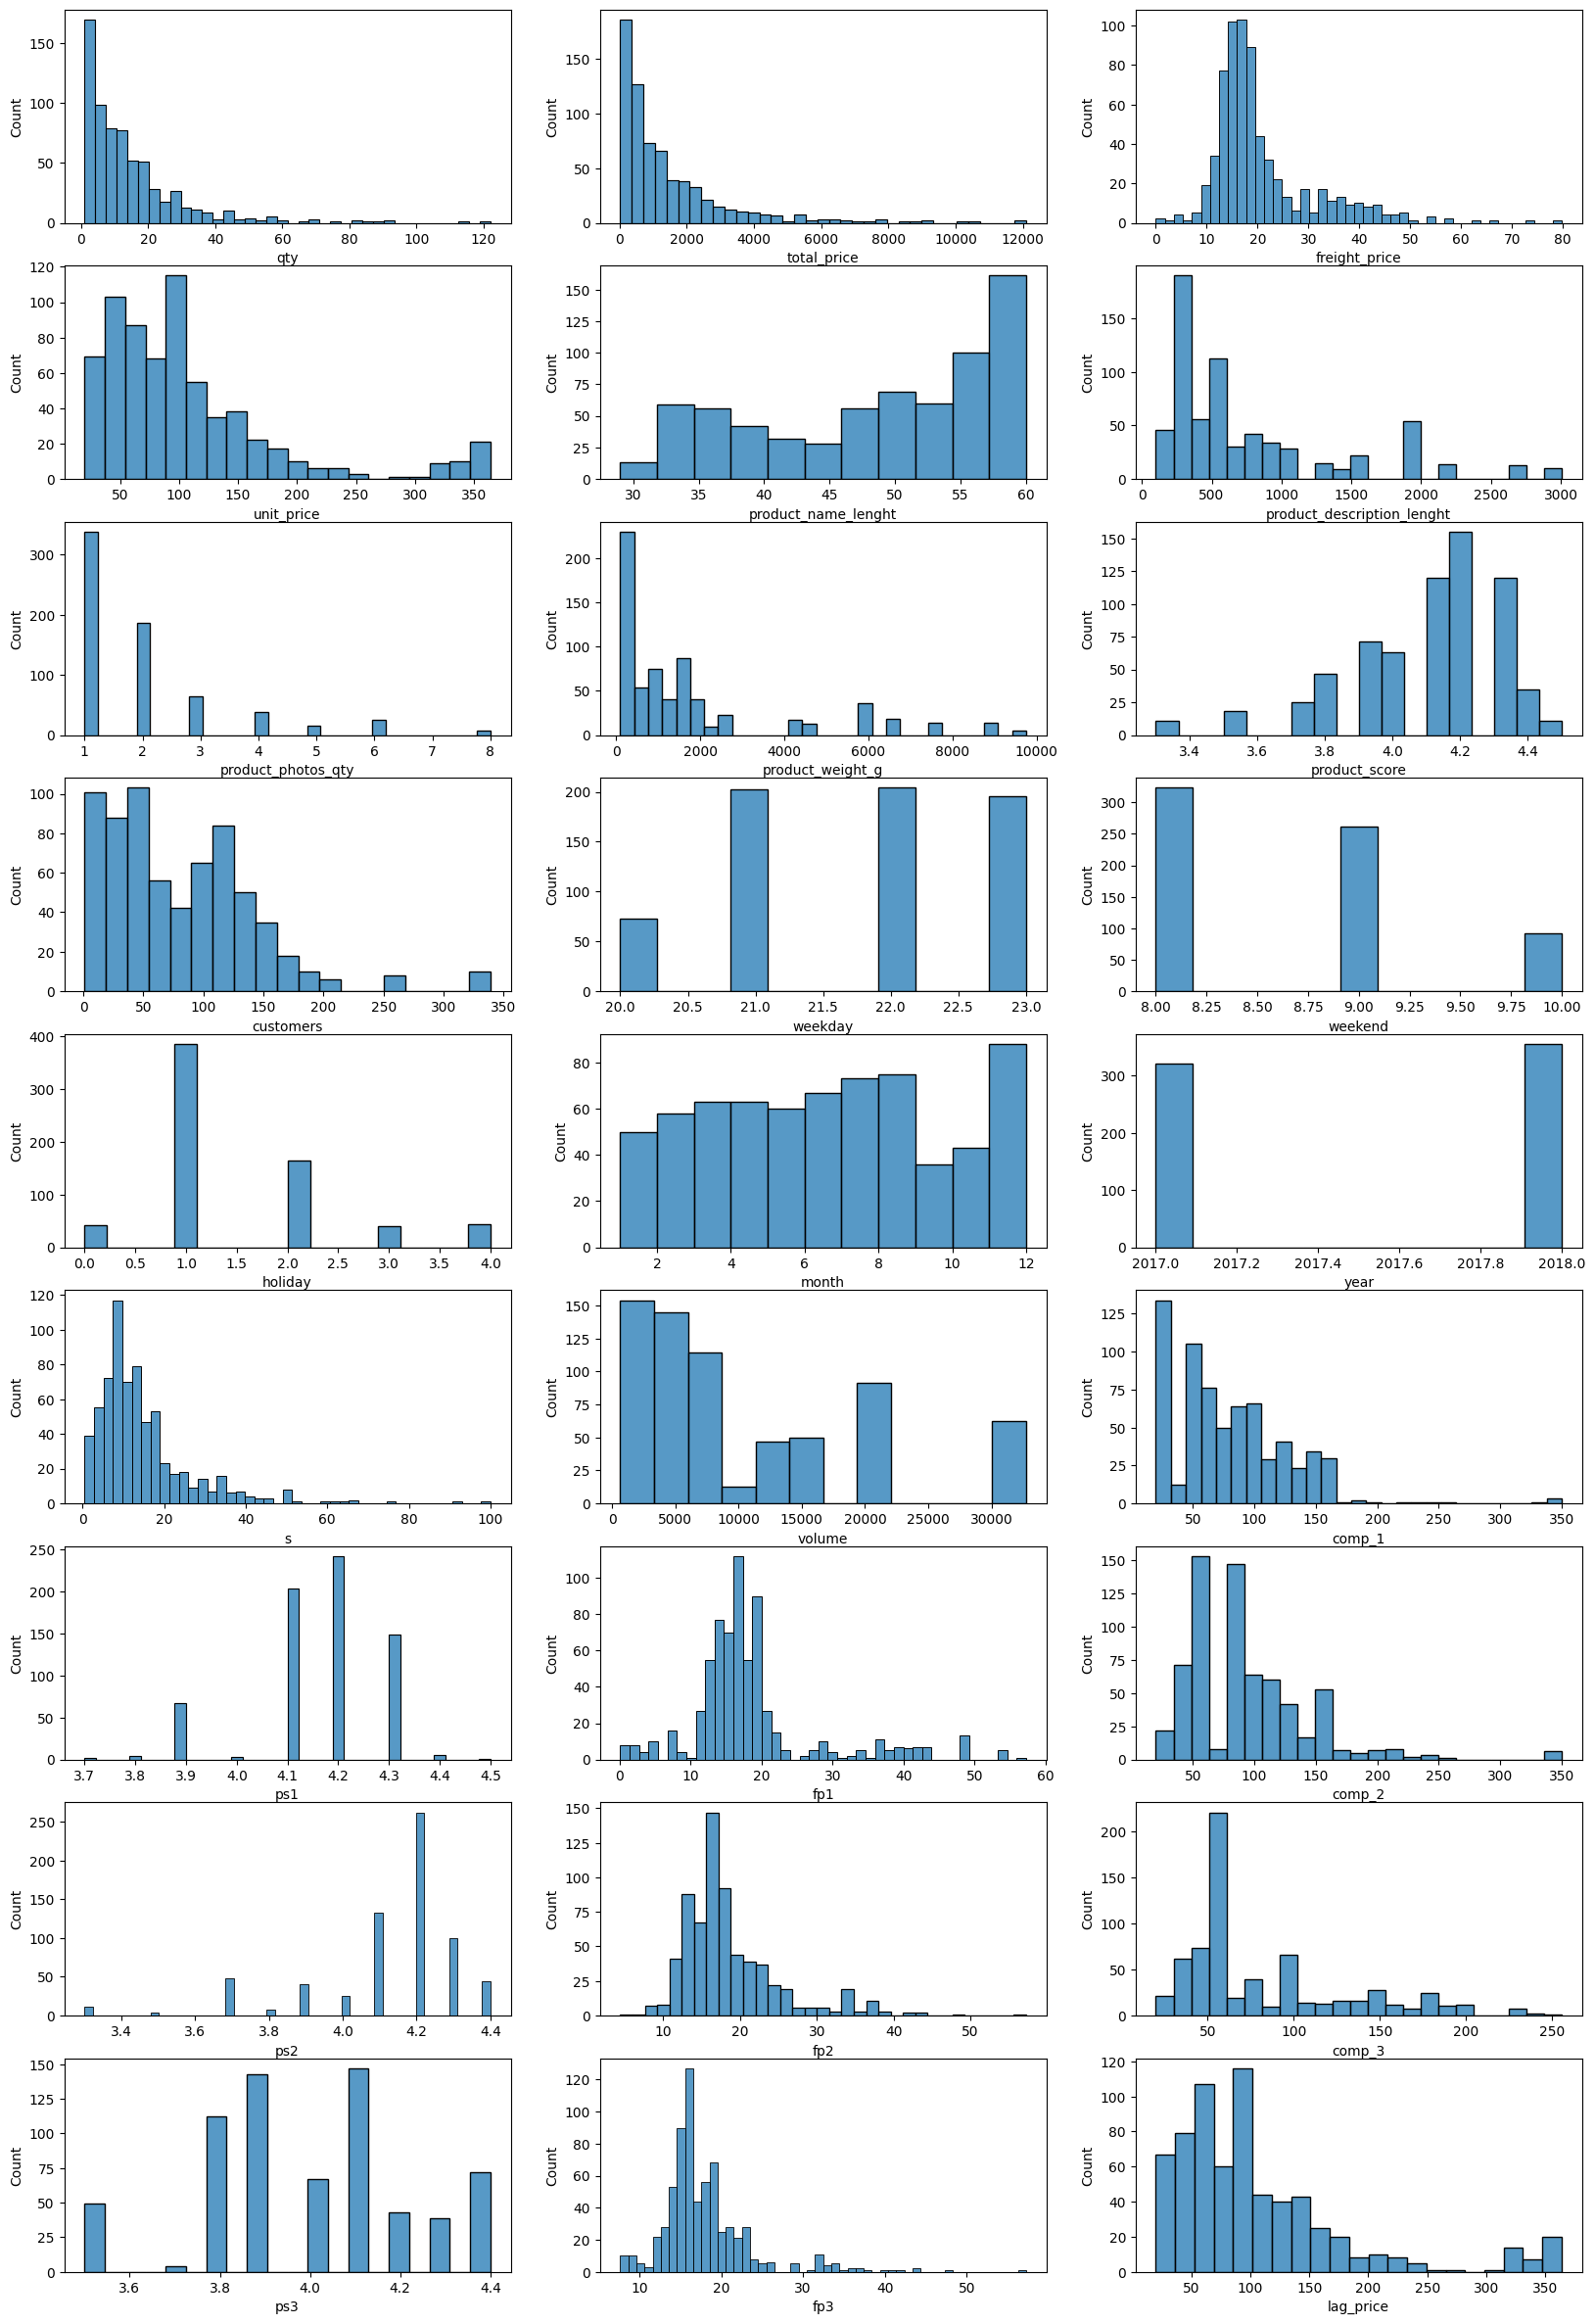

In [6]:
def distribution(df):
    """
    Plot the distribution of a column in a dataframe using seaborn.
    """
    fig, axes = plt.subplots(9, 3, figsize=(20, 30))
    for i, col in enumerate(df.columns):
        ax = axes[i//3-1, i%3]
        if df[col].dtype == "object":
            continue
        sns.histplot(df[col], ax=ax)
        # plt.title(col)
    
    plt.savefig("out/distribution.png")
    plt.show()
distribution(df)
plt.close()

### Outlier detection

In [39]:
def detect_outliers(df, col):
    """
    Detect outliers in a column of a dataframe
    """
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    return df[(df[col] > upper_bound) | (df[col] < lower_bound)]
for col in df.columns:
    if df[col].dtype != 'object':
        print(col, detect_outliers(df, col).shape[0])

qty 42
total_price 46
freight_price 76
unit_price 45
product_name_lenght 0
product_description_lenght 91
product_photos_qty 87
product_weight_g 117
product_score 11
customers 18
weekday 0
weekend 0
holiday 44
month 0
year 0
s 53
volume 0
comp_1 9
ps1 79
fp1 96
comp_2 17
ps2 156
fp2 44
comp_3 58
ps3 121
fp3 50
lag_price 45
unit_price_log 0


In [25]:
num_cols = []
for col in df.columns:
    if df[col].dtype != 'object':
        num_cols.append(col)
len(num_cols)

27

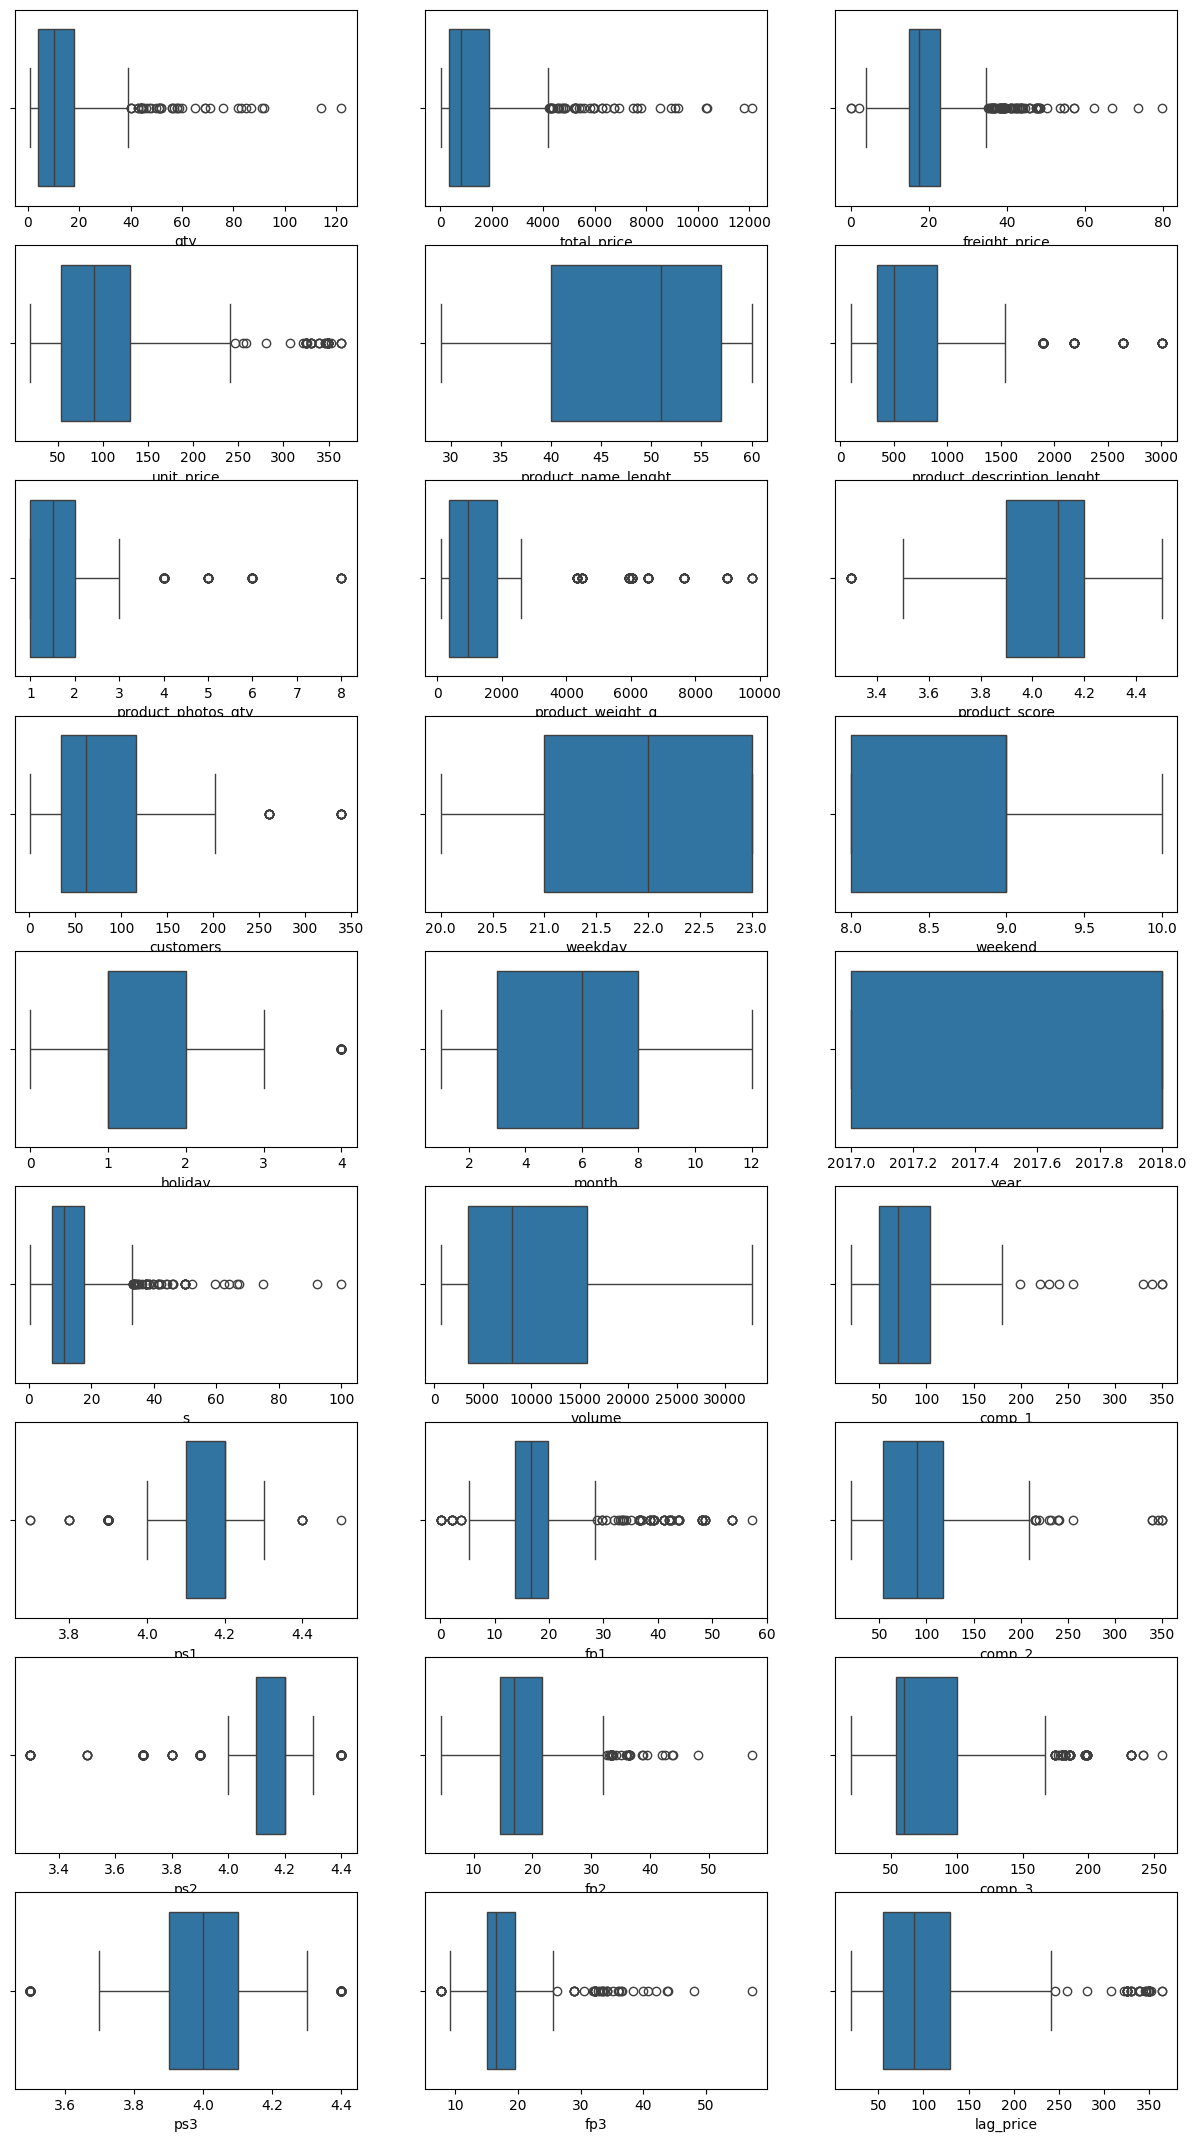

In [27]:
def boxplot(df, cols):
    """
    Plot boxplot of a column of a dataframe
    """
    fig, axes = plt.subplots(9, 3, figsize=(15, 9*3))
    for i, col in enumerate(cols):
        ax = axes[i//3, i%3]
        sns.boxplot(x=col, data=df, ax=ax)
        # plt.title(col)
    plt.savefig("out/boxplot.png")
    plt.show()
cols = ["qty", "total_price", "freight_price", "unit_price", "lag_price", "s"]
boxplot(df, num_cols)

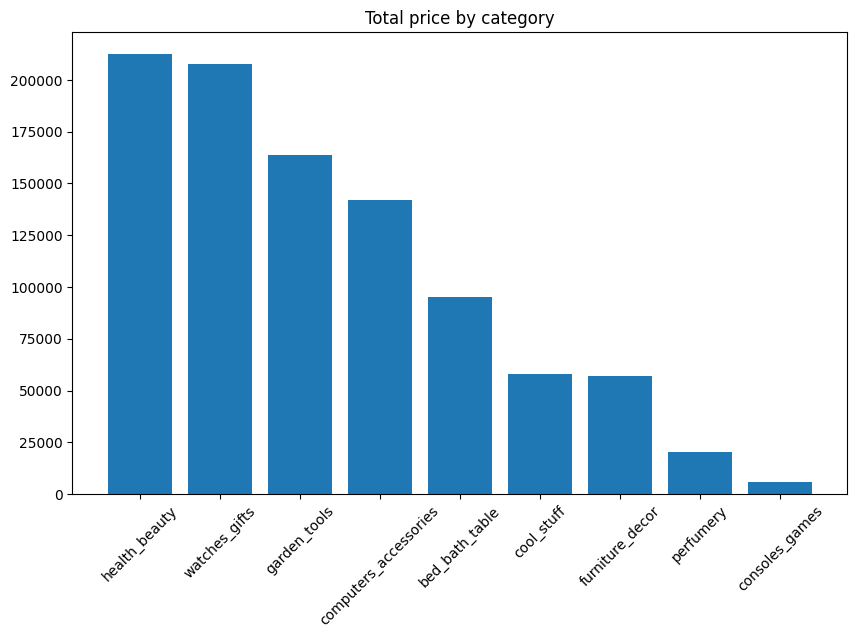

In [4]:
def total_price_by_category(df):
    """
    Plot total price by category using plt.hbar
    """
    df = df[["product_category_name", "total_price"]].groupby("product_category_name").sum().sort_values(by="total_price", ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df["total_price"])
    plt.title("Total price by category")
    plt.xticks(rotation=45)
    plt.savefig("out/total_price_by_category.png")
    plt.show()
total_price_by_category(df)

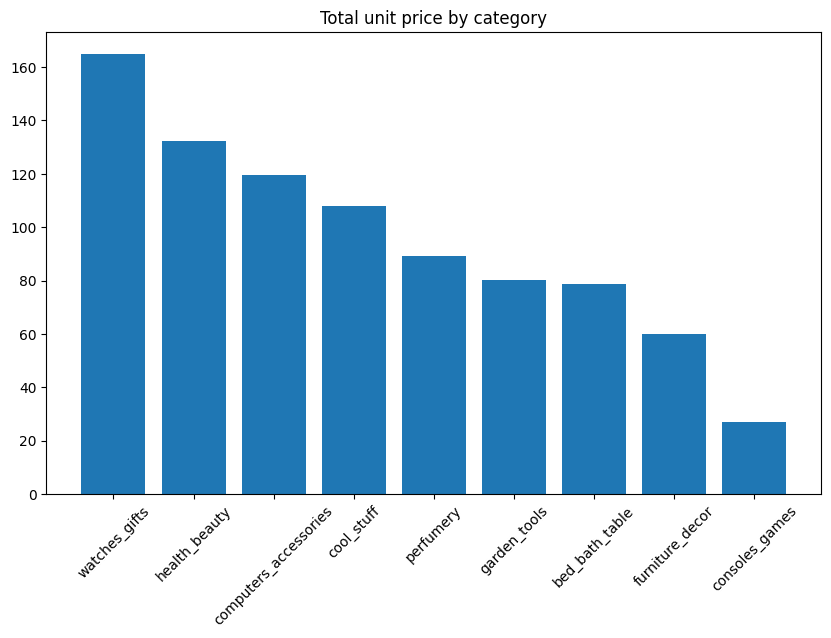

In [35]:
def mean_unit_price_by_category(df):
    """
    Plot mean unit price by category using plt.hbar
    """
    df = df[["unit_price", "product_category_name"]].groupby("product_category_name").sum().sort_values(by="unit_price", ascending=False)
    plt.figure(figsize=(10, 6))
    plt.bar(df.index, df["unit_price"])
    plt.title("Total unit price by category")
    plt.xticks(rotation=45)
    plt.savefig("out/unit_price_by_category.png")
    plt.show()
mean_unit_price_by_category(df)

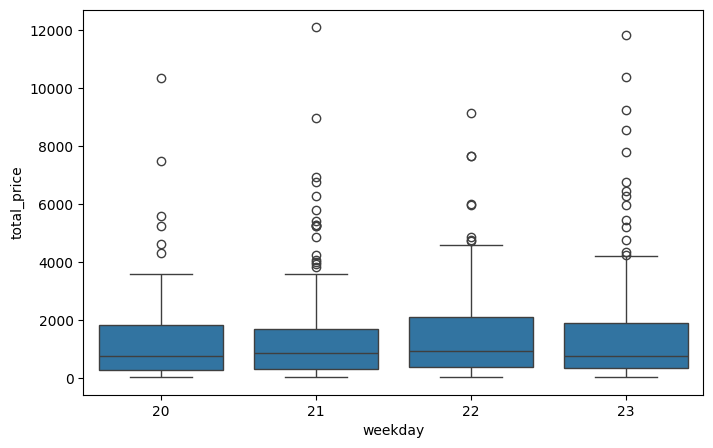

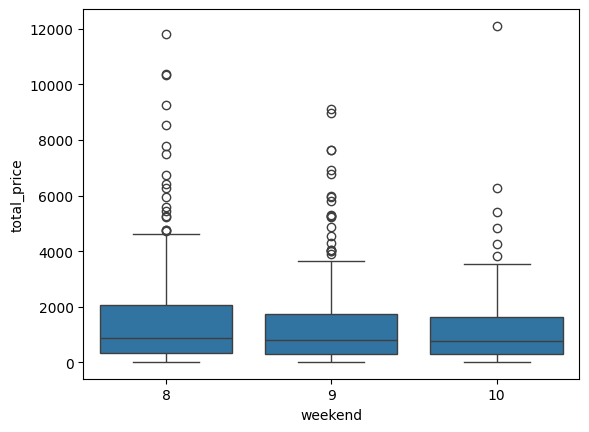

In [32]:
def boxplot_weekday(df):
    """
    Plot boxplot of total price by weekday
    """
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="weekday", y="total_price", data=df)
    # plt.bar(df["weekday"], df["total_price"])
    # plt.title("Total price by weekday")
    plt.savefig("out/total_price_by_weekday.png")
    plt.show()
    # plt.bar(df["weekend"], df["total_price"])
    sns.boxplot(x="weekend", y="total_price", data=df)
    # plt.title("Total price by weekend")
    plt.savefig("out/total_price_by_weekend.png")
    plt.show()
boxplot_weekday(df)

### Convert `month_year` column into timestamp

In [5]:
from datetime import datetime
def convert_date_timestamp(row):
    return int(datetime.strptime(row["month_year"], '%d-%m-%Y').timestamp())
df["month_year"] = df.apply(convert_date_timestamp, axis=1)


In [8]:
# sort the df on "month_year" col
df.sort_values(by="month_year", inplace=True, ignore_index=True)

### Plot time series data

In [39]:
categories = set(df["product_category_name"])
for category in categories:
    print(category)
    products = set(df[df["product_category_name"] == category]["product_id"])
    print(products)

cool_stuff
{'cool4', 'cool3', 'cool1', 'cool5', 'cool2'}
perfumery
{'perfumery2', 'perfumery1'}
consoles_games
{'consoles2', 'consoles1'}
garden_tools
{'garden3', 'garden4', 'garden9', 'garden7', 'garden5', 'garden2', 'garden10', 'garden6', 'garden1', 'garden8'}
health_beauty
{'health6', 'health10', 'health1', 'health4', 'health5', 'health2', 'health7', 'health3', 'health9', 'health8'}
computers_accessories
{'computers4', 'computers1', 'computers3', 'computers5', 'computers2', 'computers6'}
watches_gifts
{'watches5', 'watches6', 'watches7', 'watches4', 'watches1', 'watches8', 'watches3', 'watches2'}
bed_bath_table
{'bed4', 'bed3', 'bed2', 'bed1', 'bed5'}
furniture_decor
{'furniture1', 'furniture3', 'furniture4', 'furniture2'}


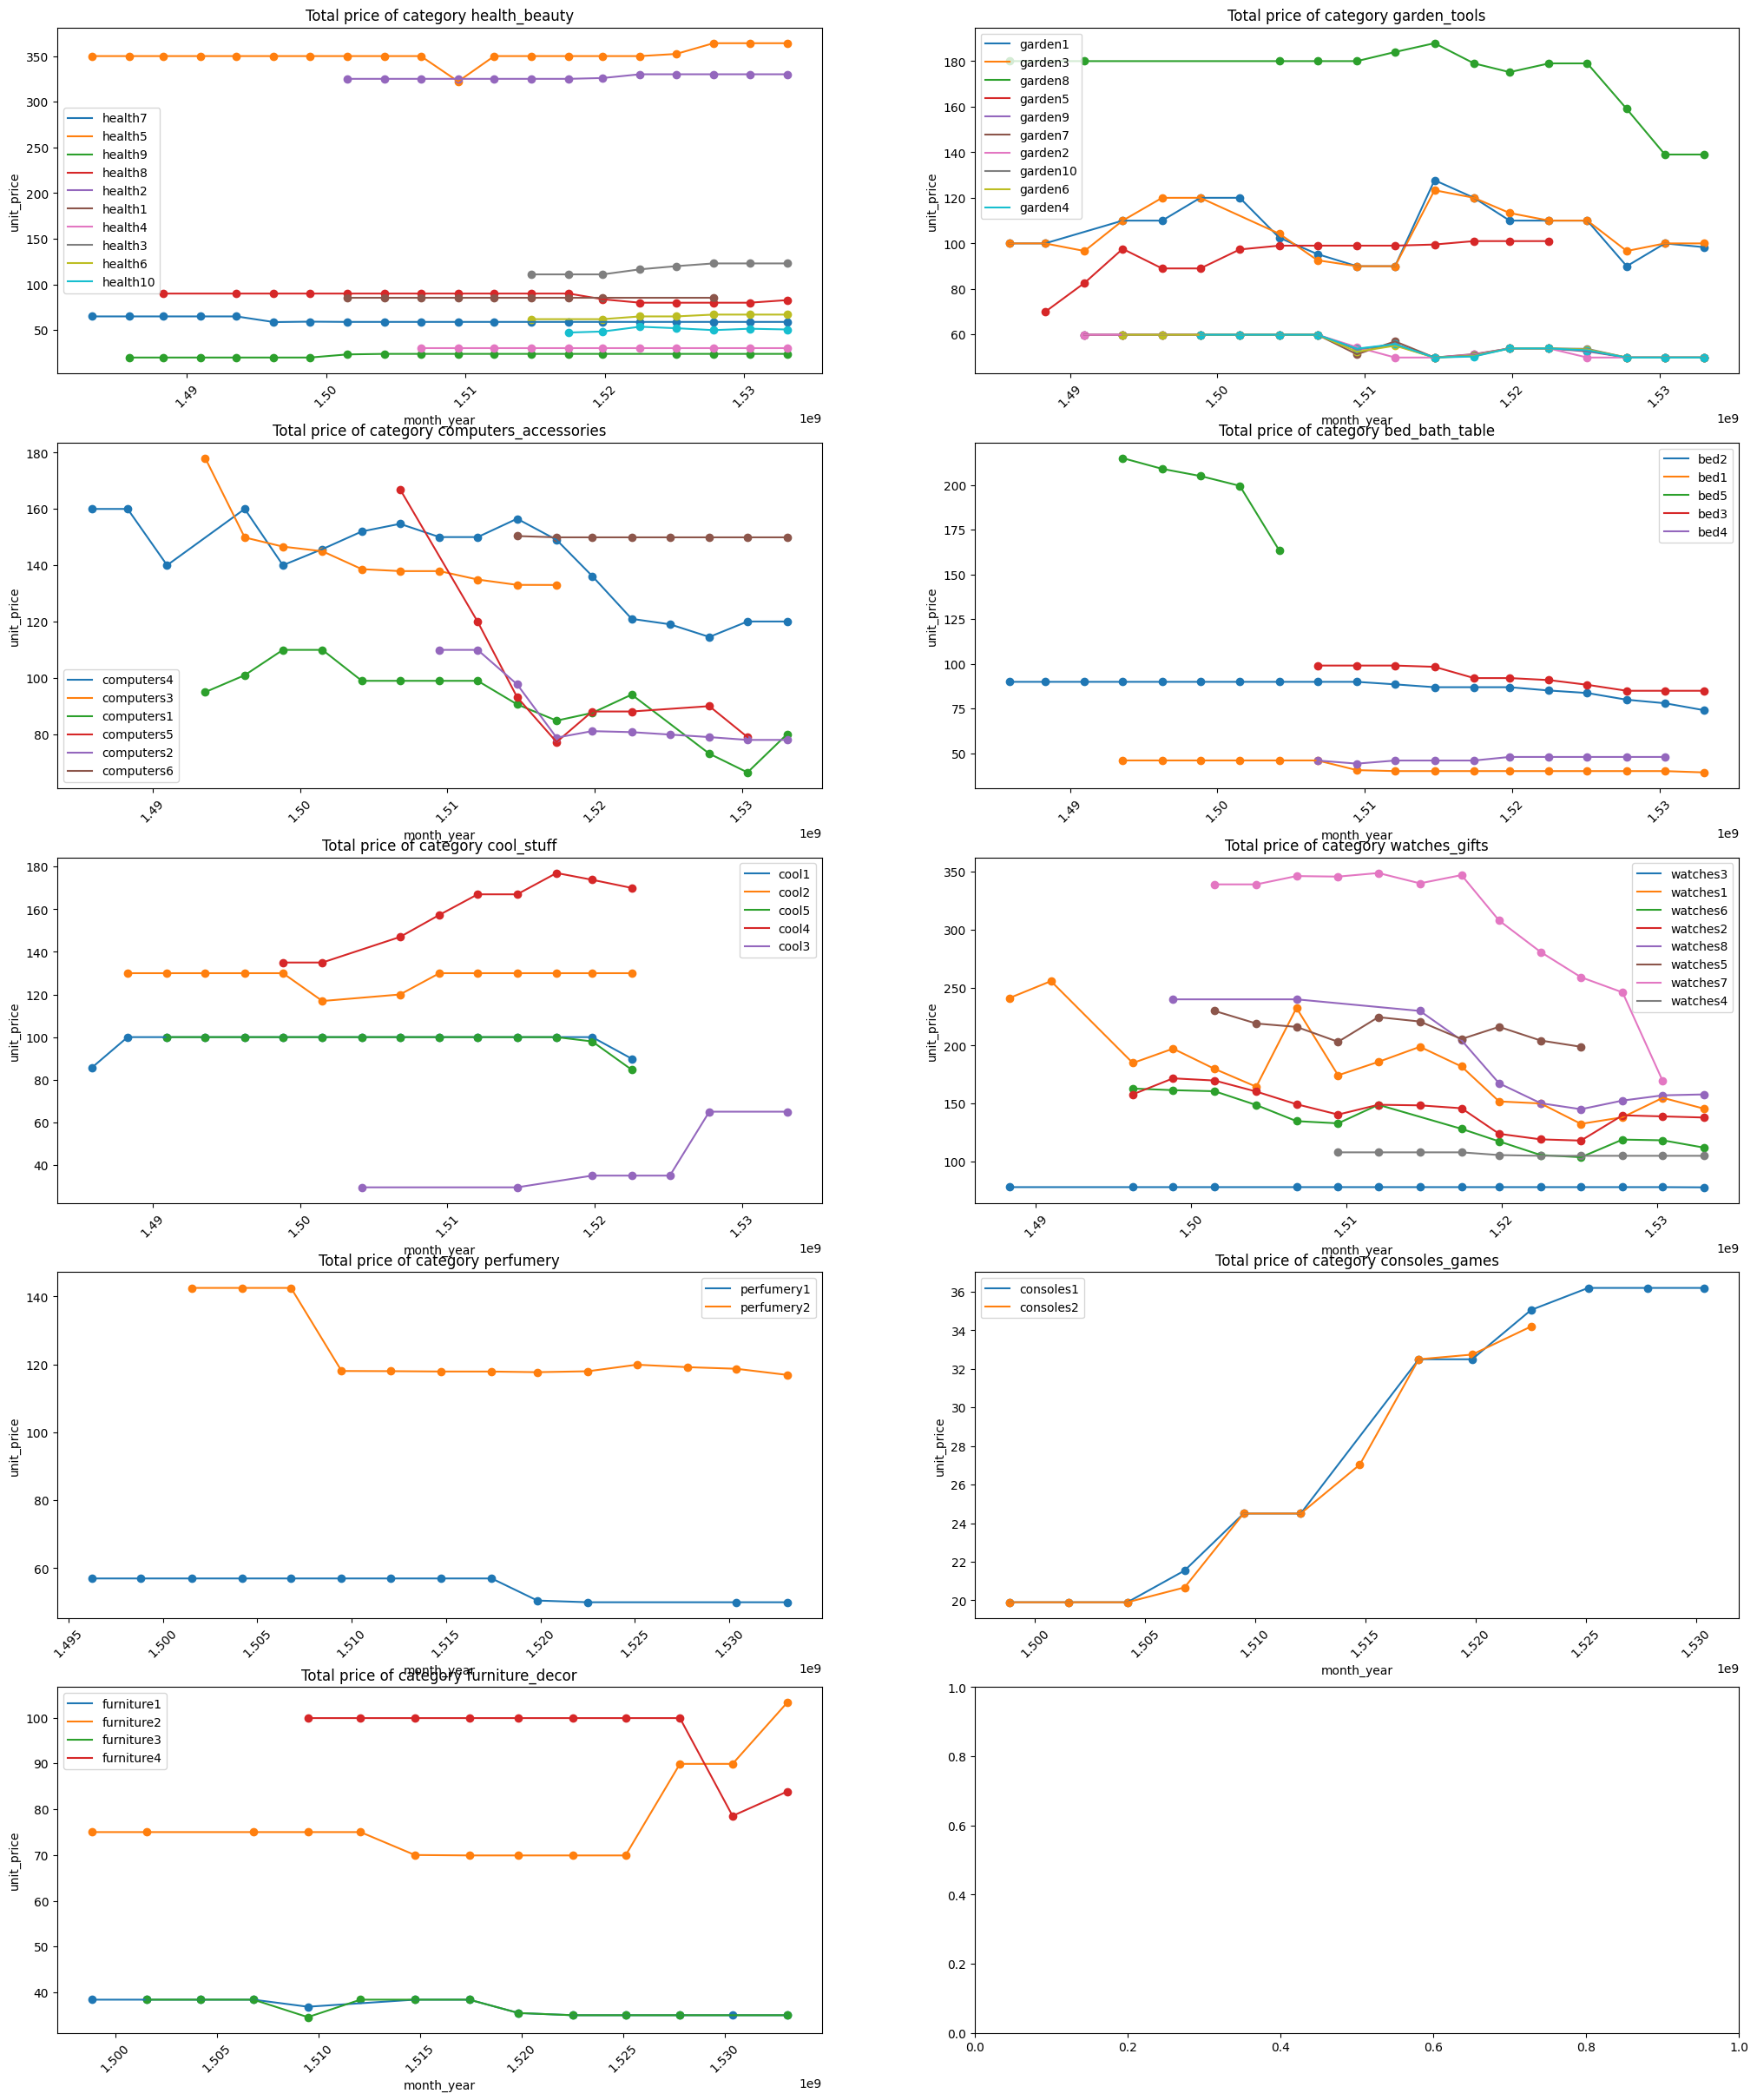

In [10]:
categories = df["product_category_name"].unique()
fig, axes = plt.subplots(nrows=len(categories)//2+1, ncols=2, figsize=(25, 30))
for idx, category in enumerate(categories):
    products = df[df["product_category_name"] == category]["product_id"].unique()
    # plt.figure(figsize=(15, 10))
    for product in products:
        data = df[df["product_id"] == product]
        # plot the data
        # ax = axes[0, 0]
        ax = axes[idx//2, idx%2]
        ax.scatter(data["month_year"], data["unit_price"])
        ax.plot(data["month_year"], data["unit_price"],label=product)
        ax.set_title(f"Total price of category {category}")
        ax.set_xlabel("month_year")
        ax.set_ylabel("unit_price")
        # ax.set_xticklabels(ax.get_xticks(), rotation=45)
        ax.tick_params(axis='x', labelrotation = 45)
        ax.legend()
plt.show()


### Correlation matrix

In [10]:
correlation_matrix = df.drop(["product_category_name", "product_id", "month_year"], axis=1).corr()
correlation_matrix.shape

(27, 27)

In [41]:
# Get indices where correlation_matrix is greater than 0.5
indices = np.where(correlation_matrix > 0.65)

# The result is a tuple of arrays, where the first array represents row indices and the second array represents column indices.
# We can iterate over these indices and print them:

for row, col in zip(*indices):
    if row != col:  # Ignore diagonal elements
        row_name = correlation_matrix.index[row]
        col_name = correlation_matrix.columns[col]
        print(f"Row: {row_name:20s} - Col: {col_name:25s}, Value: {correlation_matrix.iloc[row, col]:10.6f}")

Row: qty                  - Col: total_price              , Value:   0.749605
Row: total_price          - Col: qty                      , Value:   0.749605
Row: freight_price        - Col: product_weight_g         , Value:   0.670689
Row: unit_price           - Col: lag_price                , Value:   0.994453
Row: product_weight_g     - Col: freight_price            , Value:   0.670689
Row: comp_1               - Col: comp_3                   , Value:   0.650433
Row: comp_3               - Col: comp_1                   , Value:   0.650433
Row: lag_price            - Col: unit_price               , Value:   0.994453


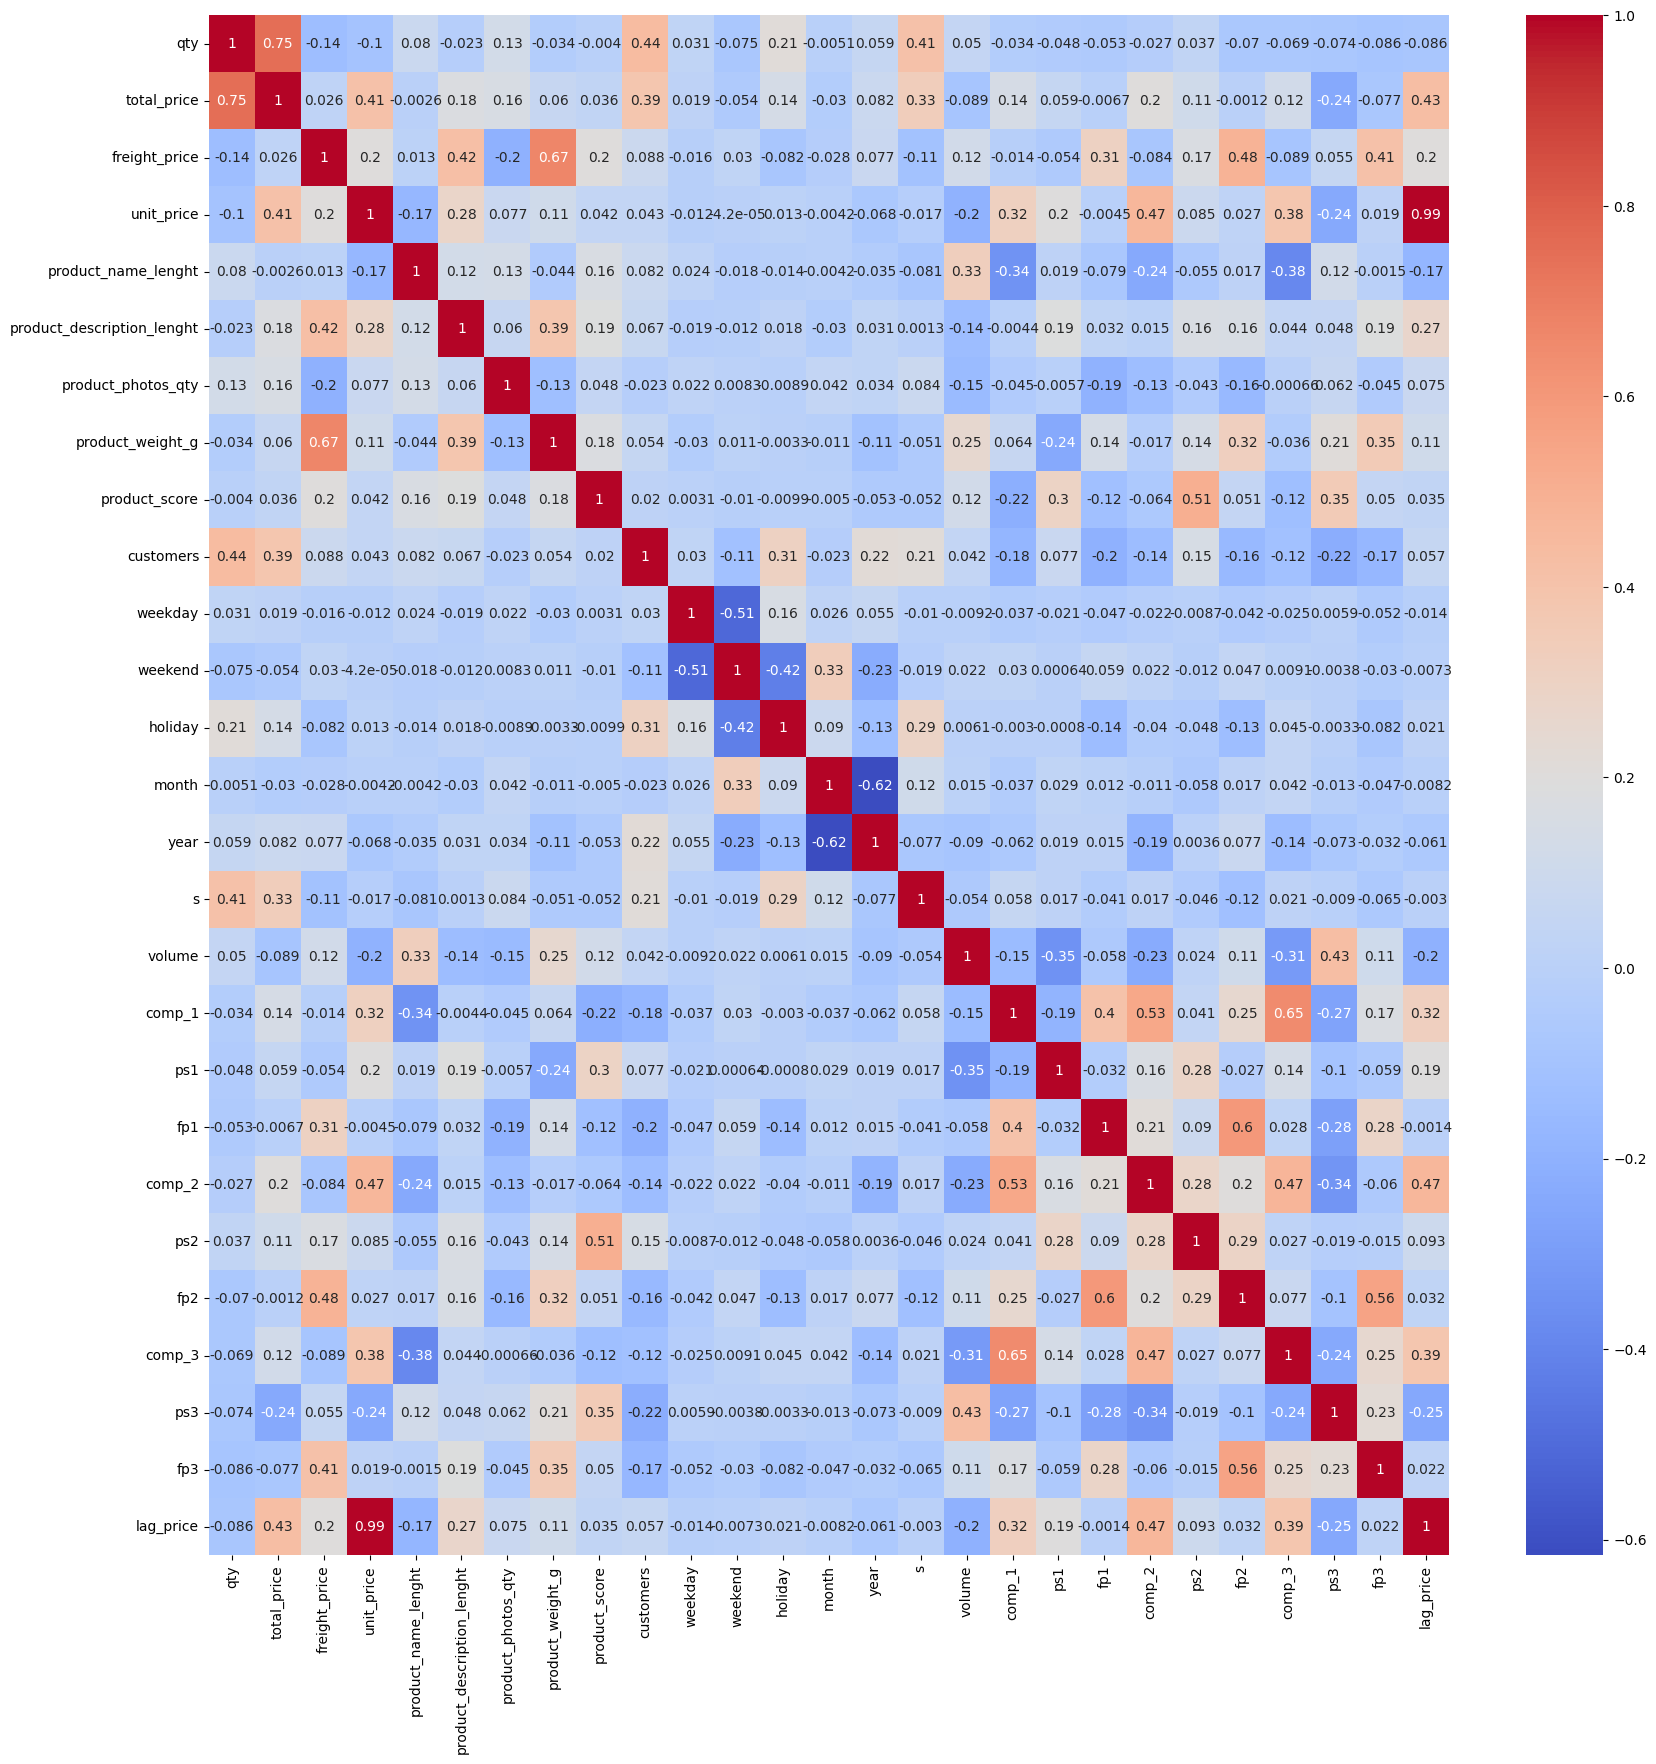

In [12]:
plt.figure(figsize=(20, 20))  # Optional: You can set the size of the figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.savefig("out/correlation_matrix.png")

## Model

### Onehot enconding

In [5]:
onehot_category = pd.get_dummies(df["product_category_name"], dtype=np.int8)
def get_id(row):
    return int(row["product_id"][len(row["product_category_name"].split("_")[0]):])
df["id"] = df.apply(get_id, axis=1)
onehot_id = pd.get_dummies(df["id"], dtype=np.int8)
df = pd.concat([df, onehot_category, onehot_id], axis=1)
df.columns = df.columns.astype(str)
df.shape

(676, 47)

In [4]:
df.drop(["product_category_name", "product_id", "month_year"], axis=1, inplace=True)
print(df.shape)
df.columns

(676, 27)


Index(['qty', 'total_price', 'freight_price', 'unit_price',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_score', 'customers',
       'weekday', 'weekend', 'holiday', 'month', 'year', 's', 'volume',
       'comp_1', 'ps1', 'fp1', 'comp_2', 'ps2', 'fp2', 'comp_3', 'ps3', 'fp3',
       'lag_price'],
      dtype='object')

### Normalize data

In [7]:
# normalize df
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Split data

In [8]:
def split_by_time(df, year, month, normalize=False):
    df["year"] = df["year"].astype(int)
    df["month"] = df["month"].astype(int)
    train = df[(df["year"] < year) | ((df["year"] == year) & (df["month"] < month))]
    # test = df[(df["year"] > year) | ((df["year"] == year) & (df["month"] >= month))]
    test = df[(df["year"] == year) & (df["month"] == month)]
    if normalize:
        train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)
        test = pd.DataFrame(scaler.transform(test), columns=test.columns)
    # print(f"Train shape: {train.shape}, Test shape: {test.shape}")
    return train, test

def split_X_y(df):
    X = df.drop(["unit_price", "lag_price", "total_price", "qty", "year", "month"], axis=1)
    y = df["unit_price"]
    # print(f"Features shape: {X.shape}, Target shape: {y.shape}")
    return X, y

### Model

In [9]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [19]:
eval = {}

In [11]:
test_months = [1, 2, 3, 4, 5, 6, 7, 8]
regressors = [LinearRegression(), RandomForestRegressor(), Ridge(), Lasso(), DecisionTreeRegressor(), XGBRegressor()]

In [20]:
for model in regressors:
    name = model.__class__.__name__
    print("Model ", name)
    if name in eval:
        continue
    eval[name] = {
        "r2": [],
        "mae": [],
        "mape": [],
    } 
    for month in test_months:
        # print(month)
        train, test = split_by_time(df, 2018, month)
        X_train, y_train = split_X_y(train)
        X_test, y_test = split_X_y(test)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mape = mean_absolute_percentage_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        eval[name]["mae"].append(mae)
        eval[name]["mape"].append(mape)
        eval[name]["r2"].append(r2)
        with open(f"model/{model.__class__.__name__}_{month}.pkl", "wb") as f:
            pkl.dump(model, f) 
        

Model  LinearRegression
Model  RandomForestRegressor
Model  Ridge
Model  Lasso
Model  DecisionTreeRegressor
Model  XGBRegressor


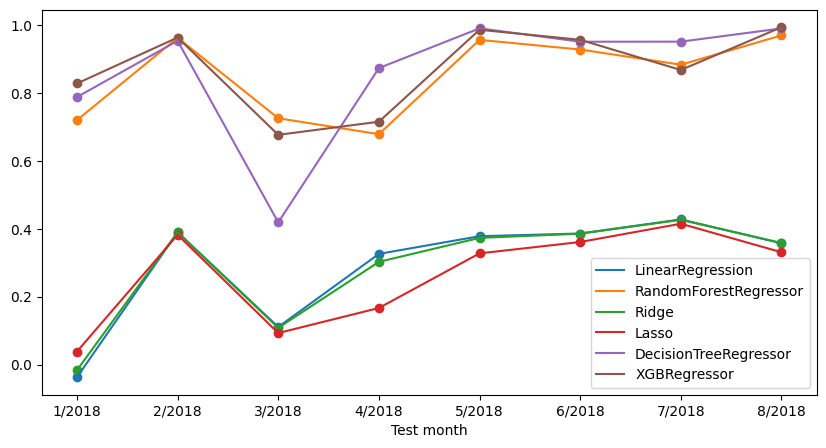

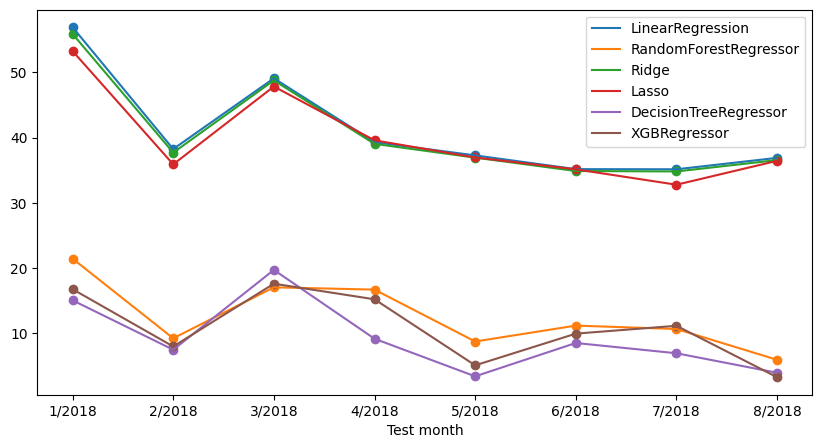

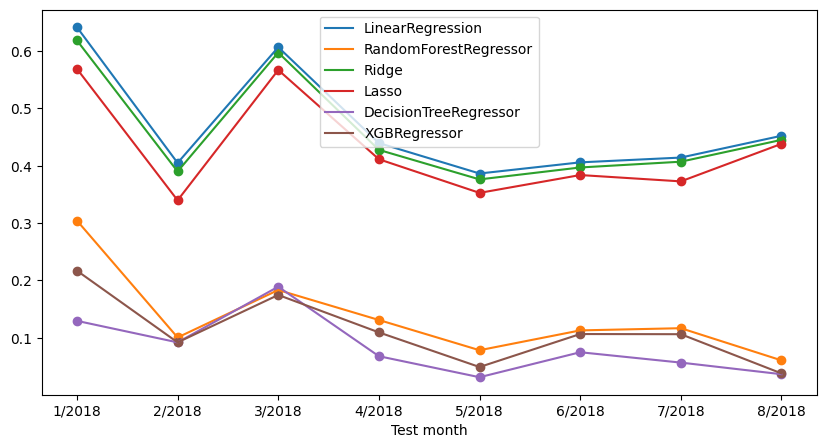

In [13]:
#plot eval results
eval_methods = [
    "r2", 
    "mae", 
    "mape"
]
for method in eval_methods:
    plt.figure(figsize=(10, 5))
    for model in regressors:
        plt.plot([f"{str(m)}/2018" for m in test_months], eval[model.__class__.__name__][method], label=model.__class__.__name__)
        plt.scatter([f"{str(m)}/2018" for m in test_months], eval[model.__class__.__name__][method])
    plt.xlabel("Test month")
    plt.legend()
    # plt.title(method.upper())
    # plt.savefig(f"out/{method}.png")
    plt.show()


In [15]:
X, y = split_X_y(train)

LinearRegression
RandomForestRegressor


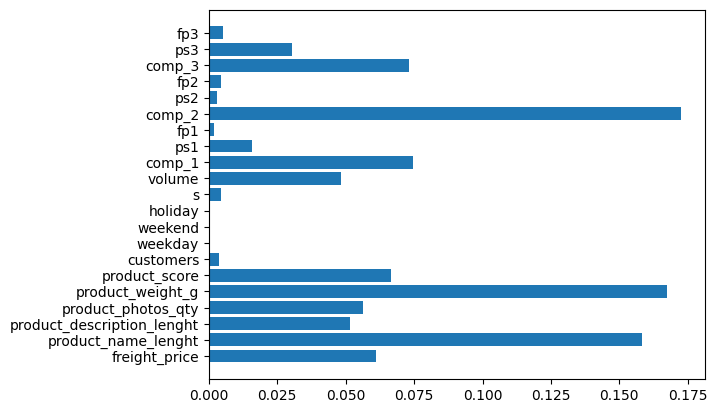

Ridge
Lasso
DecisionTreeRegressor


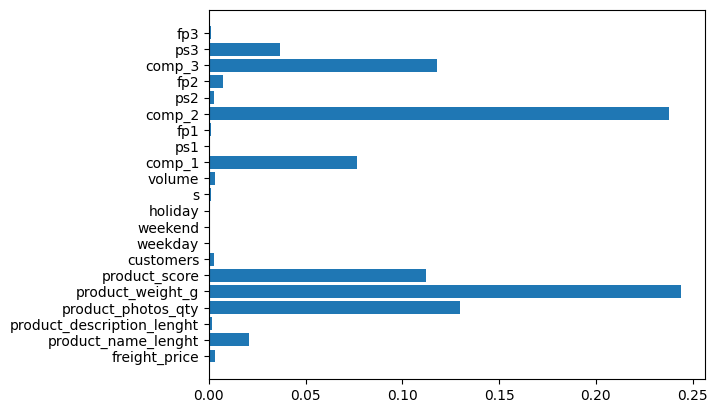

XGBRegressor


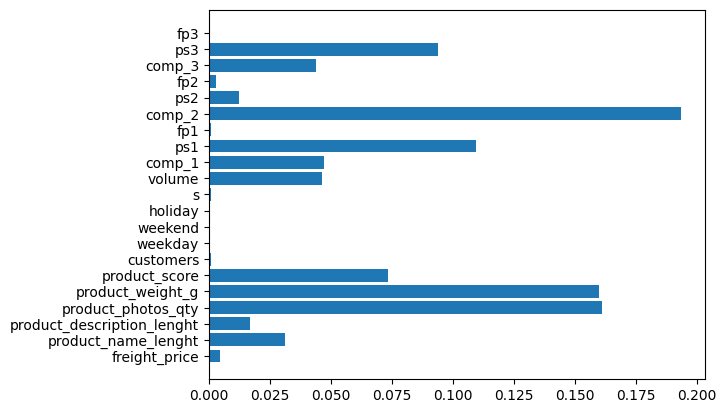

In [16]:
for reg in regressors:
    print(reg.__class__.__name__)
    if reg.__class__.__name__ in ["LinearRegression", "Lasso", "Ridge"]:
        continue
    plt.barh(X.columns, reg.feature_importances_)
    # plt.savefig(f"out/{reg.__class__.__name__}.png")
    plt.show()

    # plt.xticks(rotation=90)
